**BHARAT INTERN TASK1:** <BR>
House Price Prediction :
Develop a machine learning model for
predicting house prices using Python,
scikit-learn, and TensorFlow.

# Importing the required libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset :

In [2]:
df = pd.read_csv(r"Housing.csv")

## EDA:

In [3]:
# FIRST 10 ROWS OF THE DATASET

df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
# COLUMNS :

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
# SIZE OF THE DATASET 

df.shape

(545, 13)

**As we can see our dataset has 545 rows and 13 columns.**

In [6]:
# DATA TYPES OF THE COLUMNS OF THE DATASET

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


# Data Preprocessing :

In [9]:
# CHECKING FOR NULL VALUES

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [10]:
# CHECKING FOR DUPLICATE VALUE 
df.duplicated().sum()


0

*No null and duplicated values present our dataset.*

In [11]:
# CONVERTING ALL OUR CATEGORICAL DATA COLUMNS TO NUMERIC FORM
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)

In [12]:
colname

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [13]:
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    df[x]=le.fit_transform(df[x])

    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


Feature mainroad
mapping {'no': 0, 'yes': 1}
Feature guestroom
mapping {'no': 0, 'yes': 1}
Feature basement
mapping {'no': 0, 'yes': 1}
Feature hotwaterheating
mapping {'no': 0, 'yes': 1}
Feature airconditioning
mapping {'no': 0, 'yes': 1}
Feature prefarea
mapping {'no': 0, 'yes': 1}
Feature furnishingstatus
mapping {'furnished': 0, 'semi-furnished': 1, 'unfurnished': 2}


In [14]:
# AFTER CONVERTING OUR DATASET LOOKS LIKE THIS ...

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# Spliting The Dataset :

In [15]:
x=df.iloc[:,1:] 
y=df.iloc[:,0]

In [16]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [17]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [18]:
y=y.astype(int)

In [19]:
print(x.shape)
print(y.shape)

(545, 12)
(545,)


## Checking for corelation of the data

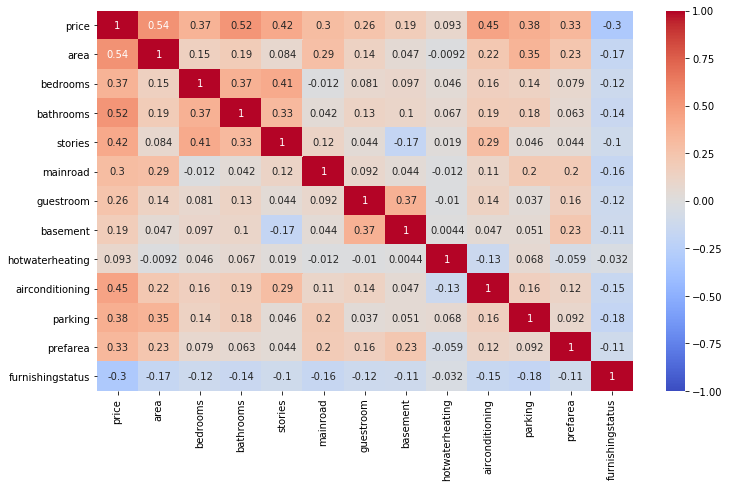

In [20]:
# CORRELATION BETWEEN THE COLUMNS

corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='coolwarm',vmax=1.0,vmin=-1.0,annot=True)

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,area,8.27
1,bedrooms,16.37
2,bathrooms,9.41
3,stories,7.88
4,mainroad,6.85
5,guestroom,1.47
6,basement,2.01
7,hotwaterheating,1.09
8,airconditioning,1.76
9,parking,1.99


## scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaler.fit(x)
x = scaler.transform(x)

# Spliting The Dataset:

In [23]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=10)

# using machine learning linear regression models

In [24]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train,y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4811346.867451982
[ 527104.03740516  128642.13533028  443287.03720628  379521.4759603
  152724.37444326  111792.8919225   207071.70612223  180451.96462169
  431273.31564494  250989.38841584  307715.64800854 -160540.85851598]


In [25]:
#Predict using the model
y_pred = lm.predict(x_test)
print(y_pred)

[ 2681363.80081243  3664373.09868586  5944784.3381943   3841290.3292573
  6540181.85551977  7034192.18931344  3613640.73162279  3082343.00523047
  5343902.75371361  3135549.10880459  5016449.30891748  2186921.99909703
  4214851.66446709  4523836.41418272  6681379.07068125  2658705.41671235
  7309664.30136863  6432084.85189715  5153007.405818    4307609.24103488
  2624173.08870132  2010665.47793781  5892660.52046589  5321068.26740851
  6817985.50543877  6166561.67354786  3624442.64301922  3725764.51466714
  3651069.31345717  3753191.86963566  4457507.12870468  5114772.64658283
  5441605.33083127  5512605.58577105  7471543.90549095  5126378.71309697
  6687268.23200342  2381713.55821321  5394949.66847378  5465189.85764973
  4941284.73567678  5324453.27770903  2937496.12039792  6491566.55469015
  5928808.79846544  7785051.12896918  8407415.77414506  6046242.26934302
  3612958.1997112   4918621.82132584  3294414.43283529  5966392.07351059
  3944799.50581332  4764390.65238042  2896459.024836

In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7331102153370134
RMSE: 866261.3444522843
Adj R-square: 0.7270901450062692


In [29]:
from sklearn.linear_model import Ridge
#create a model object
rid = Ridge()
#train the model object
rid.fit(x_train,y_train)

#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

4811337.761550195
[ 526134.98800519  129113.24156344  442606.13792661  378843.23309731
  152868.52182178  112040.47392478  206571.68090549  180061.74140557
  430712.81069797  250960.9027243   307355.65562056 -160661.47233915]


In [30]:
y_pred = rid.predict(x_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7332039192543529
RMSE: 866109.2606856363
Adj R-square: 0.7271859625458045


In [32]:
from sklearn.linear_model import ElasticNet
#create a model object
EN = ElasticNet(alpha=1, l1_ratio=0)    #Hyperparameter
#train the model object
EN.fit(x_train,y_train)

#print intercept and coefficients
print(EN.intercept_)    #Parameter
print(EN.coef_)

4809713.331502682
[ 321077.83354247  158435.78930736  284511.41899043  241461.15541066
  139550.01511697  118456.04960341  123060.87907727   93701.00643951
  277669.058797    199727.90468569  202443.51716395 -150243.28082879]


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.275e+14, tolerance: 1.593e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [33]:
y_pred = EN.predict(x_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6886075489628196
RMSE: 935700.797127745
Adj R-square: 0.6815836590898006


In [35]:
from sklearn.linear_model import Lasso
#create a model object
las = Lasso()
#train the model object
las.fit(x_train,y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

4811346.894348092
[ 527103.90926928  128641.82566319  443286.88289867  379520.94657226
  152723.80363512  111792.44485717  207071.08181779  180451.11862161
  431272.75999433  250988.92804818  307715.07589751 -160540.47785713]


In [36]:
y_pred = las.predict(x_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(y_test,y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7331105561466325
RMSE: 866260.7913582543
Adj R-square: 0.7270904935033234


# Result of all the models :

In [39]:
results = pd.DataFrame({
    'Model': ['linear reg','ridge','elastic net','lasso'],
    'Score': [73.31,73.32,68,73.31]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
73.32,ridge
73.31,linear reg
73.31,lasso
68.00,elastic net


## Out of all the model used in the prediction of price of house, the ridge model is giving a high accuracy of 73.32% and showing best result than the other models